# Machine Learning

## Laura Gagnon-Vos
## 07/28/2024

This notebook contains machine learning for the dataset, Sleep Health and Lifestyle.

In [55]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#read in csv
df = pd.read_csv('Sleep_health_and_lifestyle_dataset_cleaned.csv', na_values=[' ','N/A','Null'], keep_default_na=False)
print(df.head())

   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8   Overweight   
4                 4                       30             8   Overweight   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  \
0         126/83          77         4200           None   
1         125/80          75    

## Create and Train Model

In [56]:
#split into train and test sets specify test set size as 20%, randomize
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 123)

print(len(train_set), len(test_set))

299 75


In [57]:
#train model
#make array with desired features
X_train = train_set[['Sleep Duration']]
y_train = train_set['Quality of Sleep']


X_test = test_set[['Sleep Duration']]
y_test = test_set['Quality of Sleep']


In [58]:
lr_model = LinearRegression() #create instance of class linear regression model
lr_model.fit(X_train,y_train) #train model on training data


LinearRegression()

## Linear Regression for Sleep Duration

In [59]:
#Get results for training data
y_train_pred = lr_model.predict(X_train)
print('Results for linear regression on training data')
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lr_model.intercept_)
print(' Coefficients', lr_model.coef_)
print(' Score', lr_model.score(X_train,y_train))
print('MAE is ', mean_absolute_error(y_train, y_train_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('MSE is ', mean_squared_error(y_train, y_train_pred))
print('R^2 ', r2_score(y_train,y_train_pred))

#get results for test data
y_test_pred = lr_model.predict(X_test)
print('Results for linear regression on training data')
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lr_model.intercept_)
print(' Coefficients', lr_model.coef_)
print(' Score', lr_model.score(X_test,y_test))
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))

Results for linear regression on training data
 Default settings
Internal parameters:
 Bias is  -2.33876388559423
 Coefficients [1.35510995]
 Score 0.7780199508973105
MAE is  0.4317555393439838
RMSE is  0.5684573139193057
MSE is  0.32314371774835204
R^2  0.7780199508973105
Results for linear regression on training data
 Default settings
Internal parameters:
 Bias is  -2.33876388559423
 Coefficients [1.35510995]
 Score 0.7777886591584886
MAE is  0.4071379480695278
RMSE is  0.5309446722788899
MSE is  0.28190224502133776
R^2  0.7777886591584886


C:\Users\laura\Documents\capstone-project\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


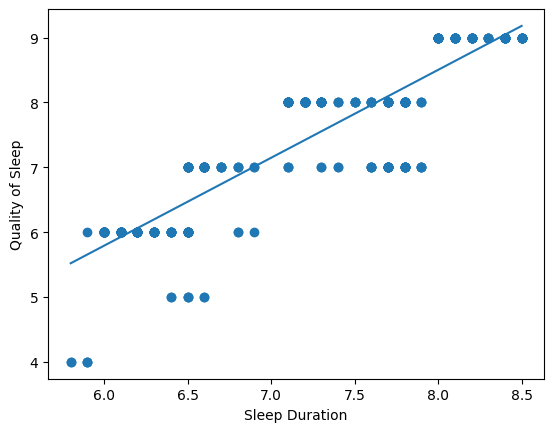

In [60]:
sleepDuration = df['Sleep Duration']
sleepQuality = df['Quality of Sleep']

min_sleepDuration = sleepDuration.min()
max_sleepDuration = sleepDuration.max()
points = 200
step_by = (max_sleepDuration - min_sleepDuration)/(points-1)

x_values = [min_sleepDuration + i*step_by for i in range(0, points)]
inputs = [[x] for x in x_values]
y_values = lr_model.predict(inputs)

#scatterplot with labels
#gender = howell_full['male']
#plt.scatter(height, weight, c=gender) #scatterplot with gender color coded
plt.scatter(sleepDuration, sleepQuality)
plt.xlabel('Sleep Duration')
plt.ylabel('Quality of Sleep')

#plt.plot(x_values, y_values, c='red')
plt.plot(x_values, y_values)
plt.show()

## Polynomial Regression Degree 3 for Sleep Duration

In [61]:
from sklearn.preprocessing import PolynomialFeatures
power = 3
poly_process = PolynomialFeatures(degree=power, include_bias=False)

#train model
#make array with desired features
#X = train_set[['Age', 'Sleep Duration']]
X_train = train_set[['Sleep Duration']]
y_train = train_set['Quality of Sleep']
X_poly_train = poly_process.fit_transform(X_train)

X_test = test_set[['Sleep Duration']]
y_test = test_set['Quality of Sleep']
X_poly_test = poly_process.fit_transform(X_test)


In [62]:
lr_model = LinearRegression()
lr_model.fit(X_poly_train,y_train)

LinearRegression()

In [63]:
# get results for training data
y_train_pred = lr_model.predict(X_poly_train)
print('Results for linear regression on training data')
print('Polynomial regression with degree ', power)
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lr_model.intercept_)
print(' Coefficients', lr_model.coef_)
print(' Score', lr_model.score(X_poly_train,y_train))
print('MAE is ', mean_absolute_error(y_train, y_train_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('MSE is ', mean_squared_error(y_train, y_train_pred))
print('R^2 ', r2_score(y_train,y_train_pred))

# get results for test data
y_test_pred = lr_model.predict(X_poly_test)
print('Results for linear regression on test data')
print('Polynomial regression with degree ', power)
print(' Default settings')
print('Internal parameters:')
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test,
y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))

Results for linear regression on training data
Polynomial regression with degree  3
 Default settings
Internal parameters:
 Bias is  -122.87495230349892
 Coefficients [51.09677388 -6.78620182  0.30625432]
 Score 0.7920746520418391
MAE is  0.42815846744162667
RMSE is  0.5501670866888128
MSE is  0.3026838232756556
R^2  0.7920746520418391
Results for linear regression on test data
Polynomial regression with degree  3
 Default settings
Internal parameters:
MAE is  0.43643866227734274
RMSE is  0.540444394770933
MSE is  0.29208014383932
R^2  0.7697658619540113


## Polynomial Regression Degree 8 for Sleep Duration

In [64]:
from sklearn.preprocessing import PolynomialFeatures
power = 8
poly_process = PolynomialFeatures(degree=power, include_bias=False)

#train model
#make array with desired features
#X = train_set[['Age', 'Sleep Duration']]
X_train = train_set[['Sleep Duration']]
y_train = train_set['Quality of Sleep']
X_poly_train = poly_process.fit_transform(X_train)

X_test = test_set[['Sleep Duration']]
y_test = test_set['Quality of Sleep']
X_poly_test = poly_process.fit_transform(X_test)

In [65]:
lr_model = LinearRegression()
lr_model.fit(X_poly_train,y_train)

LinearRegression()

In [66]:
# get results for training data
y_train_pred = lr_model.predict(X_poly_train)
print('Results for linear regression on training data')
print('Polynomial regression with degree ', power)
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lr_model.intercept_)
print(' Coefficients', lr_model.coef_)
print(' Score', lr_model.score(X_poly_train,y_train))
print('MAE is ', mean_absolute_error(y_train, y_train_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('MSE is ', mean_squared_error(y_train, y_train_pred))
print('R^2 ', r2_score(y_train,y_train_pred))

# get results for test data
y_test_pred = lr_model.predict(X_poly_test)
print('Results for linear regression on test data')
print('Polynomial regression with degree ', power)
print(' Default settings')
print('Internal parameters:')
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test,
y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))

Results for linear regression on training data
Polynomial regression with degree  8
 Default settings
Internal parameters:
 Bias is  9523335.393622074
 Coefficients [-1.10692899e+07  5.60689675e+06 -1.61659918e+06  2.90200825e+05
 -3.32149378e+04  2.36717180e+03 -9.60491766e+01  1.69889433e+00]
 Score 0.872770720753562
MAE is  0.30011772906351647
RMSE is  0.4303624988128381
MSE is  0.18521188038443007
R^2  0.872770720753562
Results for linear regression on test data
Polynomial regression with degree  8
 Default settings
Internal parameters:
MAE is  0.27902251546581586
RMSE is  0.36878256532551
MSE is  0.13600058048806404
R^2  0.8927966276281726


## Linear Regression for Stress Level

In [67]:
#train model
#make array with desired features
X_train = train_set[['Stress Level']]
y_train = train_set['Quality of Sleep']


X_test = test_set[['Stress Level']]
y_test = test_set['Quality of Sleep']

In [68]:
lr_model = LinearRegression() #create instance of class linear regression model
lr_model.fit(X_train,y_train) #train model on training data

LinearRegression()

In [69]:
#Get results for training data
y_train_pred = lr_model.predict(X_train)
print('Results for linear regression on training data')
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lr_model.intercept_)
print(' Coefficients', lr_model.coef_)
print(' Score', lr_model.score(X_train,y_train))
print('MAE is ', mean_absolute_error(y_train, y_train_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('MSE is ', mean_squared_error(y_train, y_train_pred))
print('R^2 ', r2_score(y_train,y_train_pred))

#get results for test data
y_test_pred = lr_model.predict(X_test)
print('Results for linear regression on training data')
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lr_model.intercept_)
print(' Coefficients', lr_model.coef_)
print(' Score', lr_model.score(X_test,y_test))
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))

Results for linear regression on training data
 Default settings
Internal parameters:
 Bias is  10.62725529504053
 Coefficients [-0.61548854]
 Score 0.8015009183533094
MAE is  0.407162140456567
RMSE is  0.5375515741359737
MSE is  0.28896169485606316
R^2  0.8015009183533094
Results for linear regression on training data
 Default settings
Internal parameters:
 Bias is  10.62725529504053
 Coefficients [-0.61548854]
 Score 0.8272509227881213
MAE is  0.3665115198001103
RMSE is  0.4681381401032945
MSE is  0.21915331821937178
R^2  0.8272509227881213


C:\Users\laura\Documents\capstone-project\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


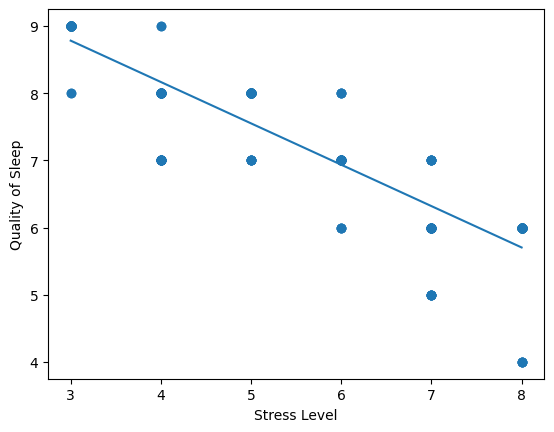

In [70]:
stressLevel = df['Stress Level']
sleepQuality = df['Quality of Sleep']

min_stressLevel = stressLevel.min()
max_stressLevel = stressLevel.max()
points = 200
step_by = (max_stressLevel - min_stressLevel)/(points-1)

x_values = [min_stressLevel + i*step_by for i in range(0, points)]
inputs = [[x] for x in x_values]
y_values = lr_model.predict(inputs)

#scatterplot with labels
#gender = howell_full['male']
#plt.scatter(height, weight, c=gender) #scatterplot with gender color coded
plt.scatter(stressLevel, sleepQuality)
plt.xlabel('Stress Level')
plt.ylabel('Quality of Sleep')

#plt.plot(x_values, y_values, c='red')
plt.plot(x_values, y_values)
plt.show()

## Polynomial Regression Degree 3 for Stress Level

In [71]:
from sklearn.preprocessing import PolynomialFeatures
power = 3
poly_process = PolynomialFeatures(degree=power, include_bias=False)

#train model
#make array with desired features
#X = train_set[['Age', 'Sleep Duration']]
X_train = train_set[['Stress Level']]
y_train = train_set['Quality of Sleep']
X_poly_train = poly_process.fit_transform(X_train)

X_test = test_set[['Stress Level']]
y_test = test_set['Quality of Sleep']
X_poly_test = poly_process.fit_transform(X_test)

In [72]:
lr_model = LinearRegression()
lr_model.fit(X_poly_train,y_train)

LinearRegression()

In [73]:
# get results for training data
y_train_pred = lr_model.predict(X_poly_train)
print('Results for linear regression on training data')
print('Polynomial regression with degree ', power)
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lr_model.intercept_)
print(' Coefficients', lr_model.coef_)
print(' Score', lr_model.score(X_poly_train,y_train))
print('MAE is ', mean_absolute_error(y_train, y_train_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('MSE is ', mean_squared_error(y_train, y_train_pred))
print('R^2 ', r2_score(y_train,y_train_pred))

# get results for test data
y_test_pred = lr_model.predict(X_poly_test)
print('Results for linear regression on test data')
print('Polynomial regression with degree ', power)
print(' Default settings')
print('Internal parameters:')
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test,
y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))

Results for linear regression on training data
Polynomial regression with degree  3
 Default settings
Internal parameters:
 Bias is  12.423263675349911
 Coefficients [-1.67289247  0.1933932  -0.01115055]
 Score 0.8029230356848908
MAE is  0.3959492978592526
RMSE is  0.5356225083982581
MSE is  0.286891471502842
R^2  0.8029230356848908
Results for linear regression on test data
Polynomial regression with degree  3
 Default settings
Internal parameters:
MAE is  0.35888048198738237
RMSE is  0.46295226329525097
MSE is  0.2143247980901954
R^2  0.8310570362587796


## Polynomial Regression Degree 8 for Stress Level

In [74]:
from sklearn.preprocessing import PolynomialFeatures
power = 8
poly_process = PolynomialFeatures(degree=power, include_bias=False)

#train model
#make array with desired features
#X = train_set[['Age', 'Sleep Duration']]
X_train = train_set[['Sleep Duration']]
y_train = train_set['Quality of Sleep']
X_poly_train = poly_process.fit_transform(X_train)

X_test = test_set[['Sleep Duration']]
y_test = test_set['Quality of Sleep']
X_poly_test = poly_process.fit_transform(X_test)

In [75]:
lr_model = LinearRegression()
lr_model.fit(X_poly_train,y_train)

LinearRegression()

In [76]:
# get results for training data
y_train_pred = lr_model.predict(X_poly_train)
print('Results for linear regression on training data')
print('Polynomial regression with degree ', power)
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lr_model.intercept_)
print(' Coefficients', lr_model.coef_)
print(' Score', lr_model.score(X_poly_train,y_train))
print('MAE is ', mean_absolute_error(y_train, y_train_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('MSE is ', mean_squared_error(y_train, y_train_pred))
print('R^2 ', r2_score(y_train,y_train_pred))

# get results for test data
y_test_pred = lr_model.predict(X_poly_test)
print('Results for linear regression on test data')
print('Polynomial regression with degree ', power)
print(' Default settings')
print('Internal parameters:')
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test,
y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))

Results for linear regression on training data
Polynomial regression with degree  8
 Default settings
Internal parameters:
 Bias is  9523335.393622074
 Coefficients [-1.10692899e+07  5.60689675e+06 -1.61659918e+06  2.90200825e+05
 -3.32149378e+04  2.36717180e+03 -9.60491766e+01  1.69889433e+00]
 Score 0.872770720753562
MAE is  0.30011772906351647
RMSE is  0.4303624988128381
MSE is  0.18521188038443007
R^2  0.872770720753562
Results for linear regression on test data
Polynomial regression with degree  8
 Default settings
Internal parameters:
MAE is  0.27902251546581586
RMSE is  0.36878256532551
MSE is  0.13600058048806404
R^2  0.8927966276281726


# Results
Results  for our regression models.
| Model | Training Features | Set | RMSE | R2 |
|:---|:---|:---|:---|:---|
|Linear Regression|Sleep Duration|Training|5.68|77.80|
|Linear Regression|Sleep Duration|Test|5.31|77.78|
|Polynomial Regression Degree 3|Sleep Duration|Training|5.50|79.21|
|Polynomial Regression Degree 3|Sleep Duration|Test|5.40|76.97|
|Polynomial Regression Degree 8|Sleep Duration|Training|4.30|87.28|
|Polynomial Regression Degree 8|Sleep Duration|Test|3.69|89.28|
|Linear Regression|Stress Level|Training|5.38|80.15|
|Linear Regression|Stress Level|Test|4.68|82.73|
|Polynomial Regression Degree 3|Stress Level|Training|5.36|80.29|
|Polynomial Regression Degree 3|Stress Level|Test|4.63|83.11|
|Polynomial Regression Degree 8|Stress Level|Training|4.30|87.28|
|Polynomial Regression Degree 8|Stress Level|Test|3.69|89.28|

# Results
Results  for our regression models reordered for better comparative view.
| Model | Training Features | RMSE training | RMSE testing | R2 training | R2 testing|
|:---|:---|:---|:---|:---|:---|
|Linear Regression|Sleep Duration|5.68|5.31|77.80|77.78
|Polynomial Regression Degree 3|Sleep Duration|5.50|5.40|79.21|76.97|
|Polynomial Regression Degree 8|Sleep Duration|4.30|3.69|87.28|89.29|
|Linear Regression|Stress Level|5.38|4.68|80.15|82.73|
|Polynomial Regression Degree 3|Stress Level|5.36|4.63|80.29|83.11|
|Polynomial Regression Degree 8|Stress Level|4.30|3.69|87.28|89.28|